In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
%matplotlib inline

In [30]:
df=pd.read_csv(r"C:\Users\RAMYASRI\Downloads\Covid\covid_19_india.csv")

In [31]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [32]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [34]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [35]:
df.drop(['Time','ConfirmedForeignNational','Sno','ConfirmedIndianNational'],axis=1,inplace=True)

In [36]:
df.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [37]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [39]:
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")

In [40]:
df['Active']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [41]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [42]:
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [46]:
data=pd.pivot_table(df,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc=max)
data.head()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646


In [47]:
data['Recovered']=data['Cured']*100/data['Confirmed']

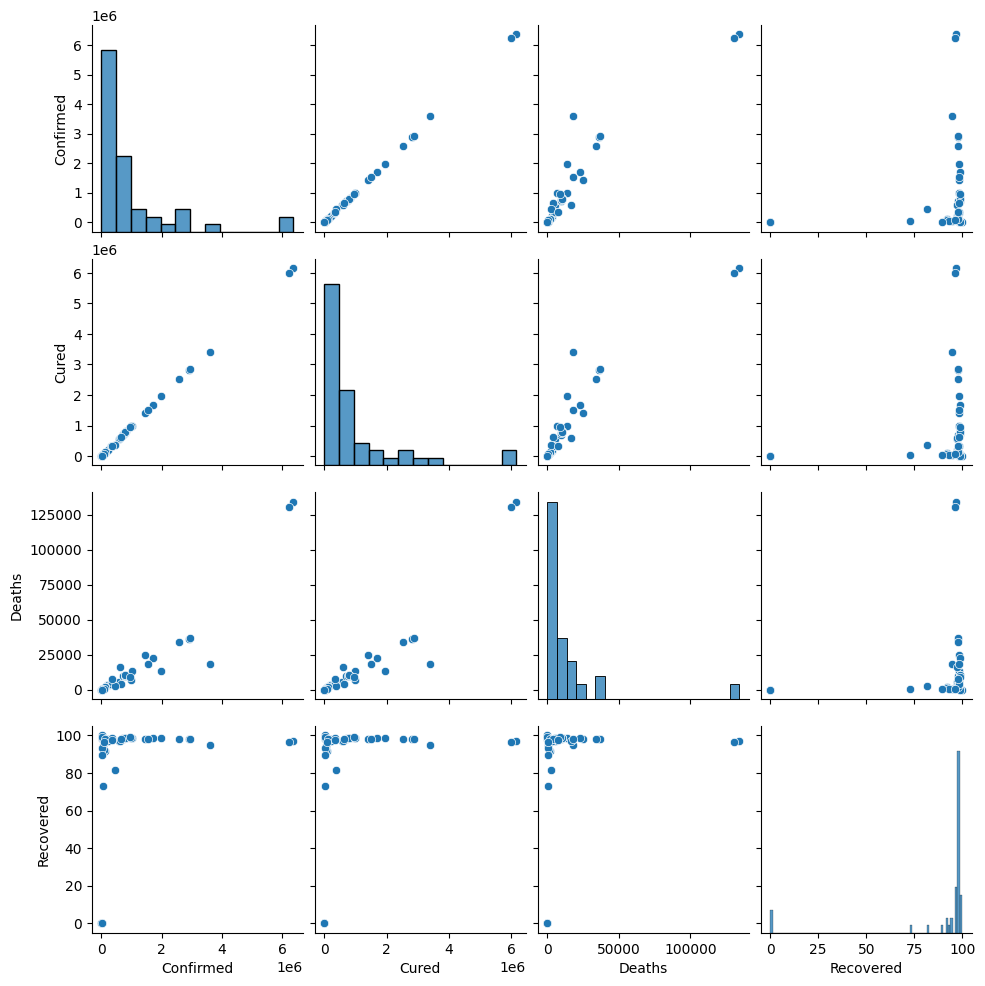

In [49]:
sns.pairplot(data)

In [123]:
top_10 = df.groupby(by='State/UnionTerritory').max()[['Active', 'Date']].sort_values(['Active'], 
                                                                                     ascending=False).reset_index()
fig = px.bar(top_10.iloc[:10], x='State/UnionTerritory', y='Active', 
             labels={'State/UnionTerritory': 'States', 'Active': 'Active Cases'})
fig.update_layout(title="Top 10 States Affected by COVID-19", xaxis_title="States", yaxis_title="Active Cases")

Text(0, 0.5, 'Deaths')

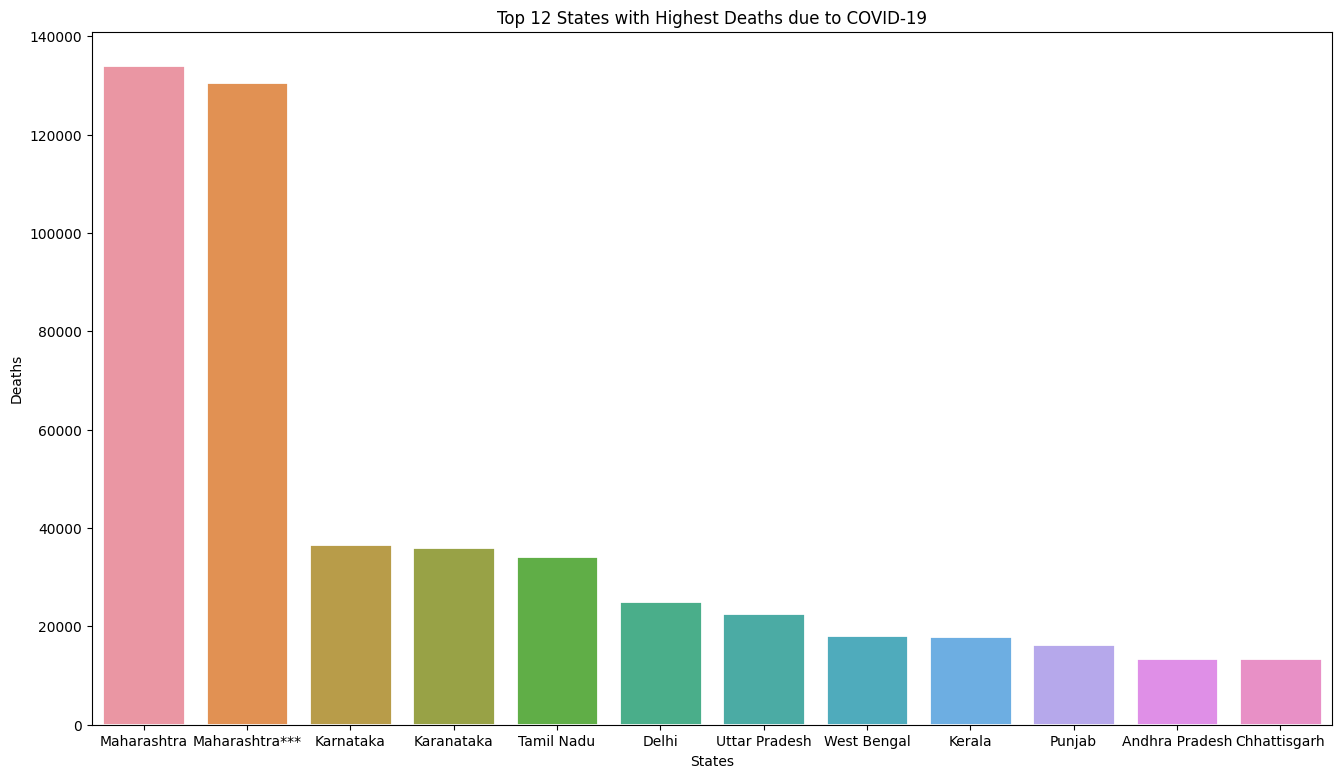

In [64]:
top_1 = df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(['Deaths'], ascending=False).reset_index()

fig1 = plt.figure(figsize=(16, 9))
plt.title("Top 12 States with Highest Deaths due to COVID-19")
df1 = sns.barplot(data=top_1.iloc[:12], y='Deaths', x="State/UnionTerritory", linewidth=2, edgecolor='white')
plt.xlabel("States")
plt.ylabel("Deaths")

In [68]:
filtered_data = df[df['State/UnionTerritory'].isin(['Telangana', 'Karnataka', 'Kerala'])]

fig = px.line(filtered_data, x='Date', y='Active', color='State/UnionTerritory',
              title='Line Plot', labels={'Date': 'Date', 'Active': 'Active Cases'})

fig.update_layout(title_text='Line Plot', title_x=0.5, title_font_size=16)
fig.show()

In [72]:
df['Recovered']=df['Cured']*100/df['Confirmed']
sorted_data = df.sort_values(by='Recovered', ascending=False)

# Select the top 10 states
top_10_data = sorted_data.head(10)

fig = px.bar(top_10_data, y='State/UnionTerritory', x='Recovered',
             title='Top 10 States by Recovery Rate',
             labels={'State/UnionTerritory': 'State', 'Recovered': 'Recovery Rate (%)'})

fig.update_layout(title_text='Top 10 States by Recovery Rate', title_x=0.5, title_font_size=16)
fig.show()

In [106]:
df2=pd.read_csv(r"C:\Users\RAMYASRI\Downloads\Covid\covid_vaccine_statewise.csv")

In [107]:
df2.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [108]:
df2.shape

(7845, 24)

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [110]:
df2.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [111]:
df2.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [113]:
df2.rename(columns = {'Updated On' : 'Vaccine_date'} ,inplace=True)
df2.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)
df2.rename(columns = {' Covaxin (Doses Administered)' : 'Covaxin'} ,inplace=True)
df2.rename(columns={'CoviShield (Doses Administered)':'Covishield'},inplace=True)

In [78]:
male=df2["Male(Individuals Vaccinated)"].sum()
female=df2["Female(Individuals Vaccinated)"].sum()
others=df2["Transgender (Doses Administered)"].sum()
fig3=px.pie(names=["Male(Individuals Vaccinated)","Female(Individuals Vaccinated)","Transgender (Doses Administered)"],
            values=[male,female,others],title="males and females vaccinated")
fig3.show()

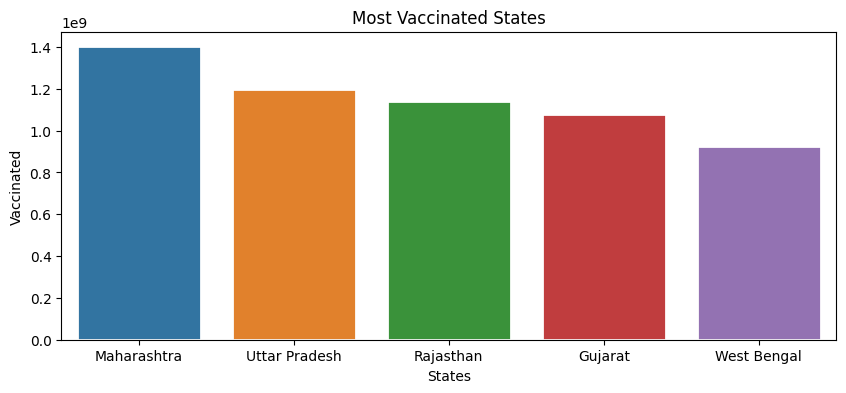

In [89]:
df2 = df2[df2.State != 'India']

# Group by state and calculate the total vaccinations
vac = df2.groupby('State')['Total'].sum().to_frame('Total')
vac = vac.sort_values('Total', ascending=False)[:5]

# Create the bar plot
fig4 = plt.figure(figsize=(10, 4))
plt.title("Most Vaccinated States")
sns.barplot(data=vac[:5], y='Total', x=vac.index, linewidth=2, edgecolor='white')
plt.xlabel("States")
plt.ylabel("Vaccinated")
plt.show()

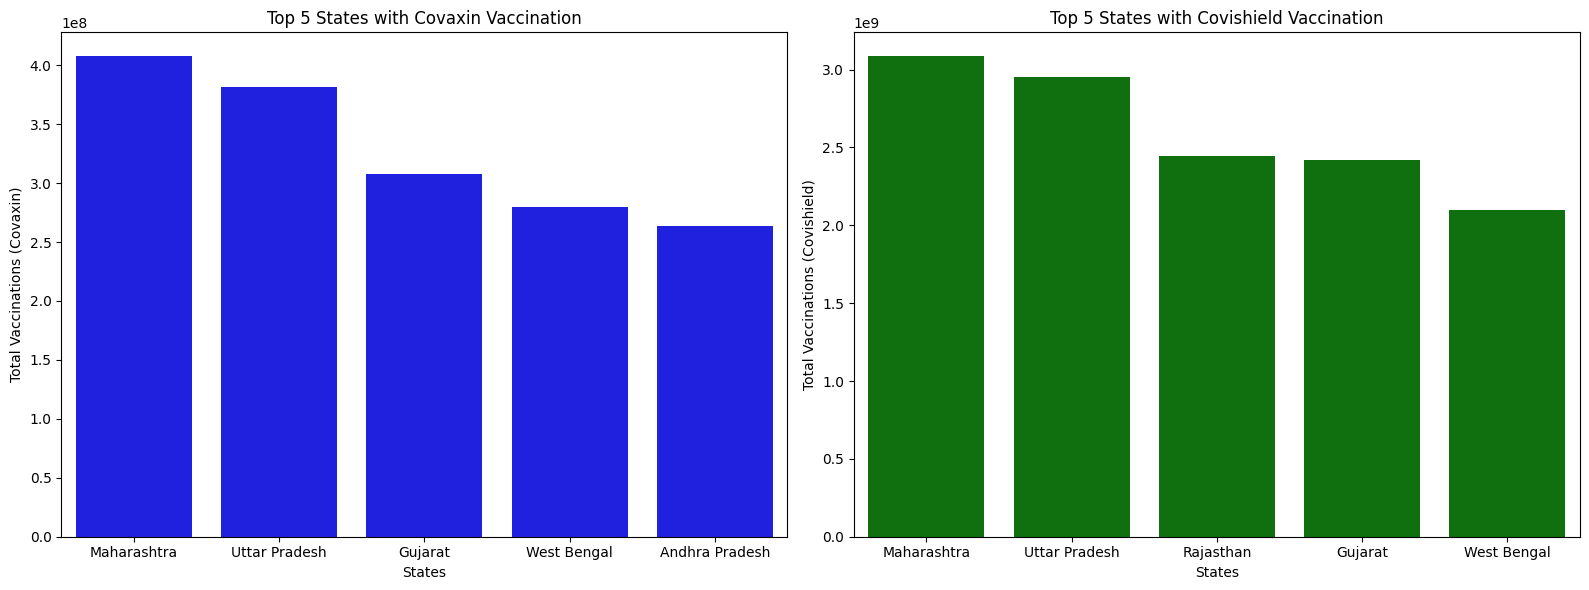

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df2' is your DataFrame
df2 = df2[df2.State != 'India']

# Filter the data for Covaxin and Covishield
covaxin_covishield_data = df2[['State', 'Covaxin', 'Covishield']]

# Group by state and calculate the total vaccinations
covaxin_covishield_data = covaxin_covishield_data.groupby('State').sum().reset_index()

# Sort the data separately for Covaxin and Covishield in descending order
top_5_covaxin = covaxin_covishield_data.sort_values(by='Covaxin', ascending=False).head(5)
top_5_covishield = covaxin_covishield_data.sort_values(by='Covishield', ascending=False).head(5)

# Create the bar plots for the top 5 states for Covaxin and Covishield
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=top_5_covaxin, y='Covaxin', x='State', ax=axes[0], color='b')
axes[0].set_title("Top 5 States with Covaxin Vaccination")
axes[0].set_ylabel("Total Vaccinations (Covaxin)")
axes[0].set_xlabel("States")

sns.barplot(data=top_5_covishield, y='Covishield', x='State', ax=axes[1], color='g')
axes[1].set_title("Top 5 States with Covishield Vaccination")
axes[1].set_ylabel("Total Vaccinations (Covishield)")
axes[1].set_xlabel("States")

plt.tight_layout()
plt.show()
